In [1]:
import numpy as np
import network
import monte_carlo
import networkx as nx
import matplotlib.pyplot as plt

from network import SatisfiaMaximiserNetwork
from agents import SatisfiaAgent, MaximiserAgent, SATISFIA_SET, MAXIMISER_SET, Agent
from games import Game, JOBST_GAME
from monte_carlo import MonteCarlo, combined_strategies

In [2]:
class NetworkByCentrality(SatisfiaMaximiserNetwork):

    def __init__(self,
                 game: Game,
                 strategy_dict: dict,
                 satisfia_share: float,
                 generations: int,
                 base_graph: nx.Graph,
                 draw_network_interval: int,
                 shift_most_central: int,
                 learn_param_a: float = 0.5,
                 learn_param_b: float = 0.5,
                 ):
        
        self.shift_most_central = shift_most_central
        super().__init__(game, strategy_dict, satisfia_share, 
                         generations, base_graph, draw_network_interval)

    def initialize_graph(self, base_graph: nx.Graph):
        self.graph = base_graph  #Please review ## Maybe better to provide base graph to get_avg_closeness?
        nodes_by_closeness_centrality = self.get_avg_closeness_centrality()

        nodes_by_closeness_centrality = {k: v for k, v in sorted(nodes_by_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
        
        self.agent_list = np.roll(self.agent_list, self.shift_most_central)
        
        for i, node in enumerate(nodes_by_closeness_centrality.keys()):
            self.graph.nodes[node]['data'] = self.agent_list[i]

        return self.graph  ## Maybe better to provide base graph to get_avg_closeness?


In [3]:
N_AGENTS = 50
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)

In [4]:
my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                0.4,
                                100,
                                BASE_BARABASI,
                                50,
                                0
)

--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=20) with 0 and Neighbor SatisfiaAgent(ID=2) with 0 payoff
new learner: SatisfiaAgent(ID=20), new neighbor: SatisfiaAgent(ID=2)
--------------------------------------------------------------------
Switch between: Learner SatisfiaAgent(ID=13) with 0 and Neighbor MaximiserAgent(ID=44) with 0 payoff
new learner: MaximiserAgent(ID=13), new neighbor: MaximiserAgent(ID=44)
--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=26) with 0 and Neighbor SatisfiaAgent(ID=6) with 2 payoff
new learner: SatisfiaAgent(ID=26), new neighbor: SatisfiaAgent(ID=6)
--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=44) with 0 and Neighbor SatisfiaAgent(ID=13) with 2 payoff
new learner: SatisfiaAgent(ID=44), new neighbor: SatisfiaAgent(ID=13)
------------------------------------------

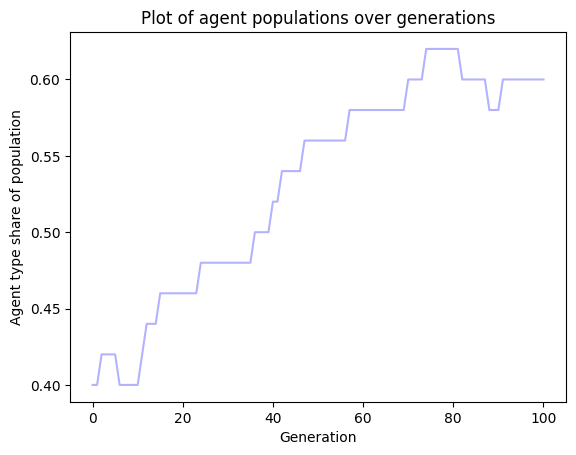

In [5]:
fig,ax=plt.subplots()
my_graph.iterate_generations(1, 1, plot=True, fig=fig,ax=ax,agent_to_plot=SatisfiaAgent)
plt.show()

In [9]:
# Constant parameters for experimenting over centrality shifts
N_AGENTS = 30
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)
SATISFIA_SHARE=0.4
# Defining range of shifts
centrality_shifts = np.arange(stop=round(N_AGENTS*(1-SATISFIA_SHARE)), step=1)

In [10]:
def experiment_over_shifts(range_of_shifts: list[int], **kwargs):

    for shift in range_of_shifts:

        my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                0.4,
                                200,
                                BASE_BARABASI,
                                100,
                                shift)
        
        my_graph.iterate_generations(1, 0.5,**kwargs)
        


--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=250) with 0 and Neighbor SatisfiaAgent(ID=236) with 0 payoff
new learner: SatisfiaAgent(ID=250), new neighbor: SatisfiaAgent(ID=236)
--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=253) with 0 and Neighbor SatisfiaAgent(ID=231) with 10 payoff
new learner: SatisfiaAgent(ID=253), new neighbor: SatisfiaAgent(ID=231)
--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=247) with 0 and Neighbor SatisfiaAgent(ID=233) with 8 payoff
new learner: SatisfiaAgent(ID=247), new neighbor: SatisfiaAgent(ID=233)
--------------------------------------------------------------------
Switch between: Learner MaximiserAgent(ID=244) with 0 and Neighbor SatisfiaAgent(ID=234) with 12 payoff
new learner: SatisfiaAgent(ID=244), new neighbor: SatisfiaAgent(ID=234)
----------------------

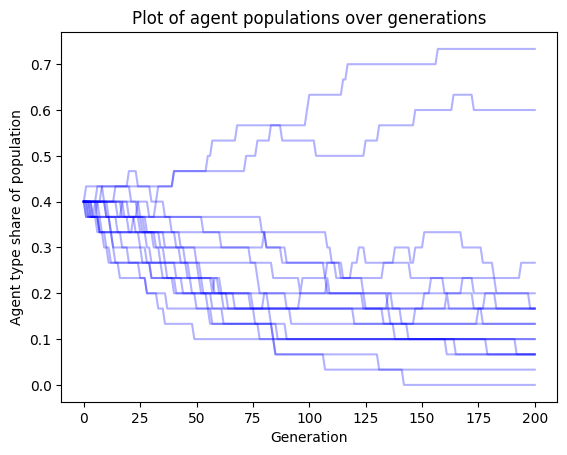

In [11]:
fig, ax = plt.subplots()
experiment_over_shifts(centrality_shifts, plot=True, fig=fig, ax=ax, agent_to_plot=SatisfiaAgent)
plt.show()